In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Mar 18 16:27:48 2018
@author: kouassi
"""
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from modelutil import test_masked_mse, test_pixel_masked_loss, mask_apply, mask_apply_crop, test_masked_corrcoef
from sklearn.metrics import mean_squared_error as rmse1
# outputname
inputname = '../data/dataset_nn.nc'
name = 'model_4layers'
exampledir = os.path.join('../figures/examples/',os.path.splitext(name)[0])

ds = xr.open_dataset(inputname)

C:\Users\stela\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


###  Erreurs (RMSE, ecart) et coeff. de correlation entre les données réelles ytrue et imputées par le réseau profond ypredict.

In [2]:
# Autre manière de calculer l'erreur dans la zone imputée 
index = np.array(ds.index).tolist() # Index des images 
nb = np.array(ds.index).shape[0]    # Dsout.index.size
# initialisation des listes 
meval = []; chla_Corrcoef = [];
chlaC = []; chla_UL = []; chla_UL = []; 
chla_UR = []; chla_DR = []; chla_DL = [];

for j,ind1 in enumerate(index):
    ytrue1 = ds.yt[j].values
    ypred1 = ds.ypredict[j].values
    # Calcul du rmse par imagette (sur chaque carré imputé)
    ev_rmse = test_masked_mse(ytrue1,ypred1)
    meval.append(ev_rmse)
    # Calcul du coef de correlation (sur chaque carré imputé)
    corr_coef = test_masked_corrcoef(ytrue1,ypred1)
    chla_Corrcoef.append(corr_coef)
    # Ecart entre chlaTrue et chlaPred pour les pixels aux coins et au centre
    chlaCenter, chlaUL, chlaUR, chlaDL, chlaDR = test_pixel_masked_loss(ytrue1, ypred1)
    chlaC.append(chlaCenter); chla_UL.append(chlaUL); chla_UR.append(chlaUL);
    chla_DL.append(chlaDL); chla_DR.append(chlaDR);

### Visualisation de ces erreurs par Histogramme

In [1]:
# Distribution de la RMSE sur le carré imputé
numBins = 60;
plt.figure('Erreur rmse')
plt.hist(meval, numBins)
plt.xlim(-0.00001,0.00045)
plt.xlabel("RMSE Values")
plt.ylabel("Frequency")
#plt.title('RMSE error on inpainted data')
plt.savefig('RMSE_error_distribution_on_inpainted_data.png')
#fig = plt.gcf()

# Figures scatter plot des erreurs entre ytrue et ypred sur le carré imputé 
num_bins = 10;
fig, axes = plt.subplots(ncols=5)
im0 = axes[0].hist(chlaC, num_bins)
axes[0].set_title("Central",fontsize=14)
axes[0].set_xlim(0,0.65); axes[0].set_ylim(0,301)
im1 = axes[1].hist(chla_UL, num_bins)
axes[1].set_title("Up Left",fontsize=14)
axes[1].set_xlim(0,0.65); axes[1].set_ylim(0,301)
im2 = axes[2].hist(chla_DL, num_bins)
axes[2].set_title("Down Left",fontsize=14)
axes[2].set_xlim(0,0.65); axes[3].set_ylim(0,301)
im3 = axes[3].hist(chla_UR, num_bins)
axes[3].set_title("Up Right",fontsize=14)
axes[3].set_xlim(0,0.65); axes[2].set_ylim(0,301)
im4 = axes[4].hist(chla_DR, num_bins)
axes[4].set_title("Down Right",fontsize=14)
axes[4].set_xlim(0,0.65); axes[4].set_ylim(0,301)



NameError: name 'plt' is not defined

### Scatter plot de l'ensemble des données du carré imputé

In [98]:
chlaTrue_all = []; chlaPred_all = []; chlaTrue_All_Var = []; chlaPred_All_Var = [];
a = np.ones((8,8)) ; chlaT = np.empty_like(a)
for j,ind1 in enumerate(index):
    ytrue1 = ds.yt[j].values
    ypred1 = ds.ypredict[j].values
    yt,yp,ytr_m,ypr_m = mask_apply(ytrue1, ypred1)
    # list de tous les ytrue et ypred
    chlaTrue_all.extend(ytr_m.tolist())
    chlaPred_all.extend(ypr_m.tolist())
    # Calcul de la variance
    chlaTm = ytr_m ; chlaPm = ypr_m;
    vtm = np.var(chlaTm, dtype=np.float64, ddof=1)
    chlaTrue_All_Var.extend((np.ones(chlaTm.shape)*vtm).tolist())
    vpm = np.var(chlaPm, dtype=np.float64, ddof=1)
    chlaPred_All_Var.extend((np.ones(chlaPm.shape)*vpm).tolist())
# sauvegarde des données sous fichiers .npy
np.save('../data/chla_trueAll.npy', np.array(chlaTrue_all))
np.save('../data/chla_predAll.npy', np.array(chlaPred_all))
np.save('../data/chlaTrue_All_Var.npy', np.array(chlaTrue_All_Var))
np.save('../data/chlaPred_All_Var.npy', np.array(chlaPred_All_Var))

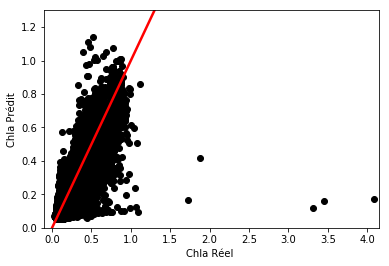

In [99]:
# Scatter plot: Chla Predict vs Chla True
plt.figure('Chla predict vs Chla true original')
plt.scatter(chlaTrue_all, chlaPred_all, c='black')
plt.xlabel('Chla Réel '); plt.ylabel('Chla Prédit')
plt.xlim(-0.1, 4.15); plt.ylim(0, 1.3)
#plt.title('Chla predict vs Chla true')
plt.plot(range(0,3),range(0,3),'-r',linewidth=2.5)
plt.savefig('../figures/examples/loss_evaluation/ytrue_vs_ypred_original.png')

En raison du grand nombre de petites valeurs, il est plus intéressant pour l'analyse de visualiser le log10 des valeurs de Chla. La limitation des valeurs faibles, indique une saturation pour les valeurs faibles.

### Scatter plot en fonction de la variances des valeurs de Chla de chaque carré

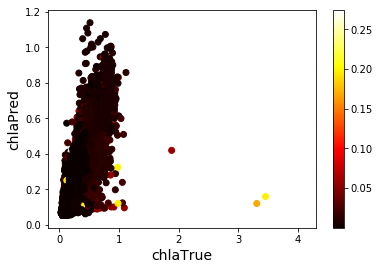

In [100]:
plt.figure()
cmhot = plt.cm.get_cmap("hot")
xs = chlaTrue_all
ys = chlaPred_all
zs = np.load('../data/chlaTrue_All_Var.npy')
plt.scatter(xs, ys, c=zs, cmap=cmhot)
plt.xlabel('chlaTrue',fontsize=14); plt.ylabel('chlaPred',fontsize=14)
plt.colorbar()
plt.show()

Revoir si tous les points du graphe y sont. +++
On constate que les points les plus éloignés de la bissectrice sont une variance élevée, au contraire des données proches ou sur la bissectrice, qui ont une variance basse. La restitution des valeurs de 

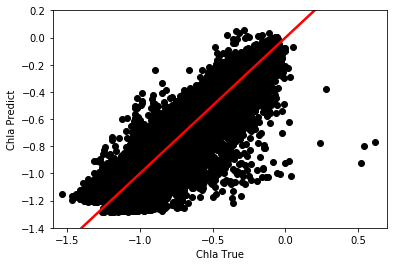

In [22]:
# Scatter plot échelle log10 : Chla Predict vs Chla True
plt.figure('Chla predict vs Chla true original')
plt.xlabel('Chla True'); plt.ylabel('Chla Predict')
plt.xlim(-1.6, 0.7); plt.ylim(-1.4, 0.2)
#plt.title('Chla predict vs Chla true')
plt.scatter(np.log10(chlaTrue_all), np.log10(chlaPred_all), c='black')
plt.plot(range(-2,2),range(-2,2),'-r',linewidth=2.5)
plt.savefig('../figures/examples/loss_evaluation/ytrue_vs_ypred_original_log10.png')

On constate une distribution de ChlaTrue vs ChlaPredict autour de la 1ère bissectrice (Droite rouge: y=x). Cela indique que globalement, les valeurs de Chla prédites sont proches ou identiques des valeus de Chla réelles. Par ailleurs, on constate que certaines valeurs grandes valeurs de Chla True correspondent à des valeurs faibles de Chla faibles. 
Cela concorde avec le constat visuel fait de la sous-estimation de chla predit sur les bords de l'image par rapport aux pixels envirronants.
Interpretation : Les effets de bord : aux bords de l'imagette, l'imputation des données manquantes dans le petit carré par le reseau de neurones profond sous-estime les grandes valeur de Chla. Cela peut être du au fait, qu'a cet endroit, le nombre de pixels disponible pour estimer l'imputation est faible... ( à discuter).

(array([3.6000e+01, 4.2000e+01, 5.9000e+01, 8.0000e+01, 9.8000e+01,
        1.1500e+02, 1.5000e+02, 1.8800e+02, 2.6900e+02, 3.6100e+02,
        5.1300e+02, 7.4100e+02, 1.0870e+03, 1.6220e+03, 2.7630e+03,
        4.6690e+03, 7.1380e+03, 1.0418e+04, 1.3593e+04, 1.6596e+04,
        1.7443e+04, 1.6471e+04, 1.4621e+04, 1.2582e+04, 1.0641e+04,
        8.2180e+03, 5.6620e+03, 3.0910e+03, 1.5310e+03, 7.1200e+02,
        3.7000e+02, 2.0200e+02, 9.9000e+01, 7.7000e+01, 4.1000e+01,
        2.7000e+01, 1.1000e+01, 2.0000e+01, 1.5000e+01]),
 array([-4.00000000e-01, -3.80000000e-01, -3.60000000e-01, -3.40000000e-01,
        -3.20000000e-01, -3.00000000e-01, -2.80000000e-01, -2.60000000e-01,
        -2.40000000e-01, -2.20000000e-01, -2.00000000e-01, -1.80000000e-01,
        -1.60000000e-01, -1.40000000e-01, -1.20000000e-01, -1.00000000e-01,
        -8.00000000e-02, -6.00000000e-02, -4.00000000e-02, -2.00000000e-02,
         3.33066907e-16,  2.00000000e-02,  4.00000000e-02,  6.00000000e-02,
         8

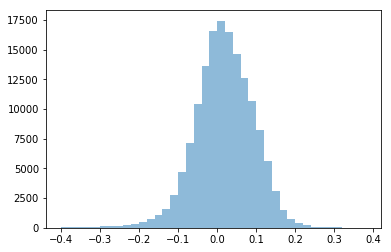

In [36]:
# Histogramme des écarts entre données prédites et réelles
plt.figure('histogramme des erreurs entre Chla pred et Chla true')
a= np.load('../data/chla_trueAll.npy'); a= np.log10(a);
b= np.load('../data/chla_predAll.npy'); b= np.log10(b);
c = np.subtract(b,a);
plt.hist(c, bins=np.arange(-0.4,0.4,0.02), alpha=0.5)
plt.xlabel('Error chlaPred-ChlaTrue')
plt.ylabel('Frequency')

La distribution des écarts entre ChlaPred et ChlaTrue, a une modedont la valeur>0, Chla pred surestime Chla. La queue de la distribution du coté des valeurs négatives est plus étendue et prend des valeurs allant jusqu'à -0.4. Cela concorde avec les grandes valeurs de Chla réelles sous-estimées au bord de l'image.
Interprétation: Effet de bord (? comment peut-on l'expliquer??)

In [43]:
# Calcul de rmse et coeff de correlation global sur les toutes données des carrés imputés
rmse_all = rmse1(chlaTrue_all, chlaPred_all)
CorrCoef_all = np.corrcoef(chlaTrue_all, chlaPred_all, bias=True)[0][1]

C:\Users\stela\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: bias and ddof have no effect and are deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


Le coefficient de correlation calculé sur les toutes les données imputées dans le "carré" a une valeur de 0.898319
Le rmse calculé sur les toutes les données imputées dans le "carré" a une valeur de 0.0013984

### Scatter plot des données du carré imputé et centré sur l'imagette 64x64

In [46]:
# Figures scatter plot ytrue vs ypred
chlaTrue_crop = []; chlaPred_crop =[];
for j,ind1 in enumerate(index):
    ytrue1 = ds.yt[j].values
    ypred1 = ds.ypredict[j].values
    cwidth = 16; cheight=16; cb = True;
    yt,yp,ytm,ypm = mask_apply_crop(ytrue1, ypred1, cwidth, cheight, cb)
    # liste des chla true et chla pred 
    chlaTrue_crop.extend(ytm.tolist())
    chlaPred_crop.extend(ypm.tolist())
    
# Sauvegarde des données
np.save('../data/chla_trueCrop.npy', np.array(chlaTrue_crop))
np.save('../data/chla_predCrop.npy', np.array(chlaPred_crop))

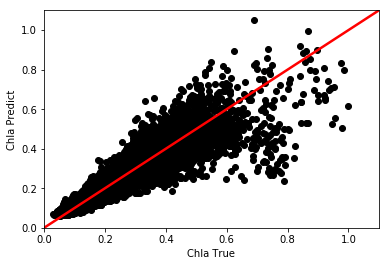

In [58]:
# Scatter plot: Chla Predict vs Chla True
plt.figure('Chla predict vs Chla true centré sur l''imagette')
plt.xlabel('Chla True', fontsize=14); plt.ylabel('Chla Predict',fontsize=14)
plt.xlim(0, 1.1); plt.ylim(0, 1.1)
#plt.title('Chla predict vs Chla true')
plt.scatter(chlaTrue_crop, chlaPred_crop, c='black')
plt.plot(range(0,3),range(0,3),'-r',linewidth=2.5)
plt.savefig('../figures/examples/loss_evaluation/ytrue_vs_ypred_32x32center.png')


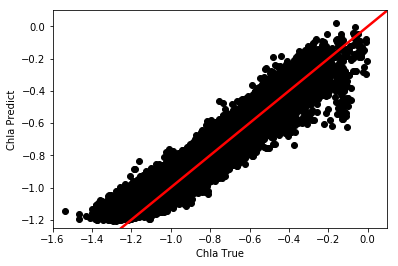

In [57]:
# Chargement des données
a = np.load('../data/chla_trueCrop.npy'); a = np.log10(a);
b = np.load('../data/chla_predCrop.npy'); b = np.log10(b);
# Scatter plot echelle log : Chla Predict vs Chla True
plt.figure('Chla predict vs Chla true centré sur l''imagette')
plt.scatter(a, b, c='black')
plt.xlabel('Chla True',fontsize=14); plt.ylabel('Chla Predict', fontsize=14)
plt.xlim(-1.6, 0.1); plt.ylim(-1.25, 0.1)
plt.plot(range(-2,3),range(-2,3),'-r',linewidth=2.5)
#plt.title('Chla predict vs Chla true')
plt.savefig('../figures/examples/loss_evaluation/ytrue_vs_ypred_32x32center_log10.png')


C:\Users\stela\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: bias and ddof have no effect and are deprecated
  if __name__ == '__main__':


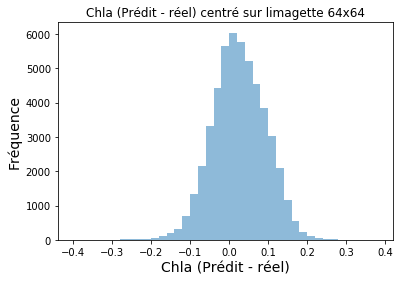

In [63]:
# Histogramme de l'ecart entre chla Pred et chla True
c = np.subtract(b,a)
plt.figure('Histogramme de l''ecart entre chla predict et chla true')
plt.hist(c, bins=np.arange(-0.4,0.4,0.02), alpha=0.5)
plt.xlabel('Chla (Prédit - réel)',fontsize=14); plt.ylabel('Fréquence',fontsize=14)
#plt.title('Chla (Prédit - réel) centré sur l''imagette 64x64')
plt.savefig('../figures/examples/loss_evaluation/histo_ecart_log10_crop.png')

La queue de la distribution pour les écarts négatif est amoindrie, la distribution est bcp plus symétrique ( ? Calcul du skewness? pour quantifier??). La sous-estimation des valeurs de Chla estimées lorsque les carrés imputés par le reseau profond est proche du bord de l'image a disparu. 
Cela met en evidence les effets de bord dans l'imputation des données manquantes par le Réseau de neurones profond.

In [66]:
# calcul de rmse et coeff de correlation global
rmse_crop = rmse1(chlaTrue_crop, chlaPred_crop)
CorrCoef_crop = np.corrcoef(chlaTrue_crop, chlaPred_crop, bias=True)[0][1]
CorrCoef_crop

C:\Users\stela\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: bias and ddof have no effect and are deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


0.9345311559267242

Le coefficient de correlation calculé sur les données imputées dans le "carré" et centée sur l'imagette a une valeur de 0.93
Le rmse calculé sur les toutes les données imputées dans le "carré" et centée sur l'imagette a une valeur de 0.0008989814

## Code de visualisation des images

In [ ]:

""" Code de visualisation d'Ariel """
nanval = -1e5
isNotSquare = np.equal(ds.yt[ind,:,:],nanval)
yt0 = (1-isNotSquare)*ds.yt[ind,:,:]
yt0 = yt0.values
yt0 = yt0.squeeze()

yp0 = (1-isNotSquare)*ds.ypredict[ind,:,:]
yp0 = yp0.values
yp0 = yp0.squeeze()

xi,yi = np.nonzero(yt0)
yts = yt0[xi[0]:xi[-1]+1,yi[0]:yi[-1]]
yps = yp0[xi[0]:xi[-1]+1,yi[0]:yi[-1]]

yt_full = isNotSquare*ds.X[ind] + (1-isNotSquare)*ds.yt[ind]

In [ ]:
if plot_full:
    fig, axes= plt.subplots(ncols=3)
    im0=axes[0].imshow(np.log10(ds.X[ind].squeeze()),vmin=vmin,vmax=vmax)
    axes[0].set_title("Input image",fontsize=14)
    im1=axes[1].imshow(np.log10(yt_full.squeeze()),vmin=vmin,vmax=vmax)
    axes[1].set_title("True Image",fontsize=14)
    im1=axes[2].imshow(np.log10(ds.yfinal[ind].squeeze()),vmin=vmin,vmax=vmax)
    axes[2].set_title("Inpainted Image",fontsize=14)
    cbar_ax = fig.add_axes([0.15, 0.12, 0.7, 0.07])
    cb=fig.colorbar(im1, cax=cbar_ax,orientation='horizontal')
    cb.set_label("log10 of Chlorophyll a concentration [$mg/m^3$]",fontsize=14)

    filename = 'Image_' + str(int(ds.index[ind]))+'_full'
    title = 'Full images comparison'
    plt.suptitle(title,fontsize=16)
    if SAVE:
        plt.savefig(os.path.join(exampledir,filename+'.png'))

if plot_square:
    fig, axes= plt.subplots(ncols=2)
    im0=axes[0].imshow(np.log10(yts.squeeze()),vmin=vmin,vmax=vmax)
    axes[0].set_title("True image",fontsize=14)
    im1=axes[1].imshow(np.log10(yps.squeeze()),vmin=vmin,vmax=vmax)
    axes[1].set_title("Inpainted Image",fontsize=14)
    cbar_ax = fig.add_axes([0.15, 0.12, 0.7, 0.07])
    cb=fig.colorbar(im1, cax=cbar_ax,orientation='horizontal')
    cb.set_label("log10 of Chlorophyll a concentration [$mg/m^3$]",fontsize=14)

    filename = 'Image_' + str(int(ds.index[ind]))+'_square'
    title = 'Comparison of missing square'
    plt.suptitle(title,fontsize=16)
    if SAVE:
        plt.savefig(os.path.join(exampledir,filename+'.png'))